# Music2Latent tests

<a href="https://colab.research.google.com/github/inspektral/onset-benchmark/blob/main/music2latent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [17]:
# %pip install music2latent

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import generators as gen
from IPython.display import Audio, display
import librosa

import utils
from music2latent import EncoderDecoder



In [19]:
encdec = EncoderDecoder()
SAMPLE_RATE = 44100


In [28]:
random_sines = gen.sine_wave(np.random.rand(10), np.random.randint(100, 1000, 10), duration=10)
for i in range(10):
    random_sines = random_sines + gen.sine_wave(np.random.rand(10), np.random.randint(100, 1000, 10), duration=10)

sine = gen.sine_wave(np.tile(adsr, 4), [440], duration=10)

random_sines = random_sines*0.5 + sine
random_sines = utils.norm(random_sines)

In [29]:
adsr = gen.adsr(0.1, 0.5, 0.0, 0.2, 20)
saw = gen.sawtooth_wave(np.tile(adsr, 4), [50], duration=10)

noise = gen.noise(duration=10)

audio = saw+noise
audio = random_sines
latent = encdec.encode(audio)

audio_recon = encdec.decode(latent)

display(Audio(audio, rate=44100))
display(Audio(audio_recon, rate=44100))


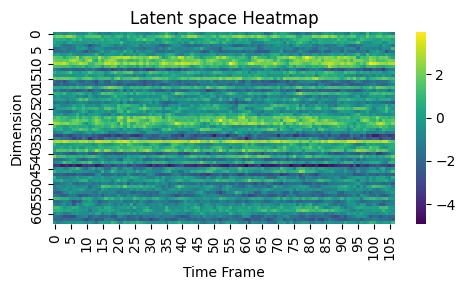

In [30]:
latent.shape
utils.plot_heatmap(latent)

In [31]:
features = encdec.encode(audio, extract_features=True)

In [32]:
print(features.shape)

torch.Size([1, 8192, 107])


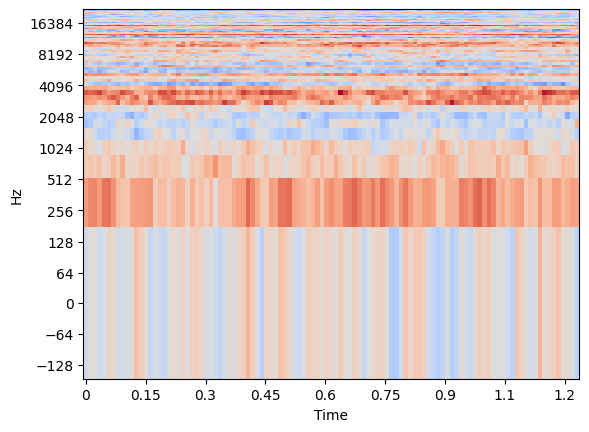

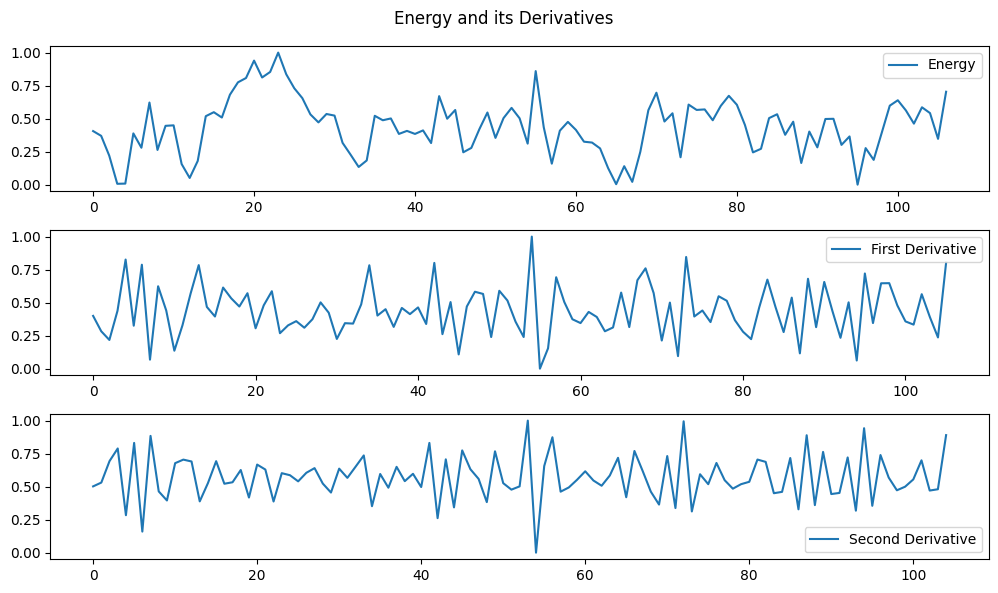

In [33]:
spectrum = latent.cpu().numpy()[0,:,:]

display(Audio(utils.add_padding(audio), rate=SAMPLE_RATE))

librosa.display.specshow(spectrum, sr=SAMPLE_RATE, x_axis='time', y_axis='log')
plt.show()

energy = np.sum(spectrum, axis=0)
d_energy = np.diff(energy)
dd_energy = np.diff(d_energy)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot((energy-np.min(energy))/ np.max(energy-np.min(energy)), label='Energy')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot((d_energy-np.min(d_energy))/ np.max(d_energy-np.min(d_energy)), label='First Derivative')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot((dd_energy-np.min(dd_energy))/ np.max(dd_energy-np.min(dd_energy)), label='Second Derivative')
plt.legend()

plt.suptitle("Energy and its Derivatives")
plt.tight_layout()
plt.show()

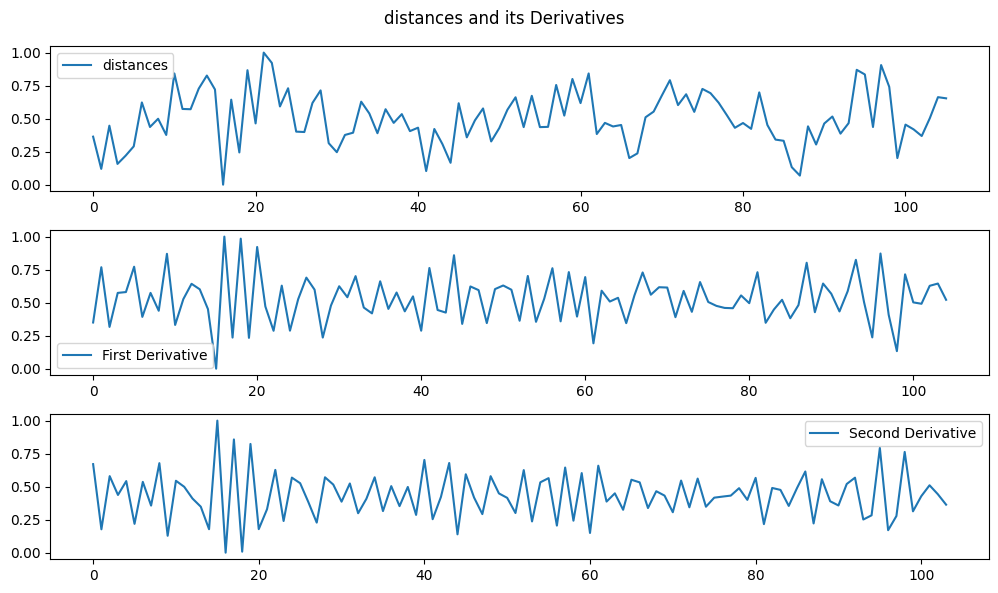

In [34]:
distances = utils.distances(spectrum)
d_distances = np.diff(distances)
dd_distances = np.diff(d_distances)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(utils.norm(distances), label='distances')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(utils.norm(d_distances), label='First Derivative')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(utils.norm(dd_distances), label='Second Derivative')
plt.legend()

plt.suptitle("distances and its Derivatives")
plt.tight_layout()
plt.show()

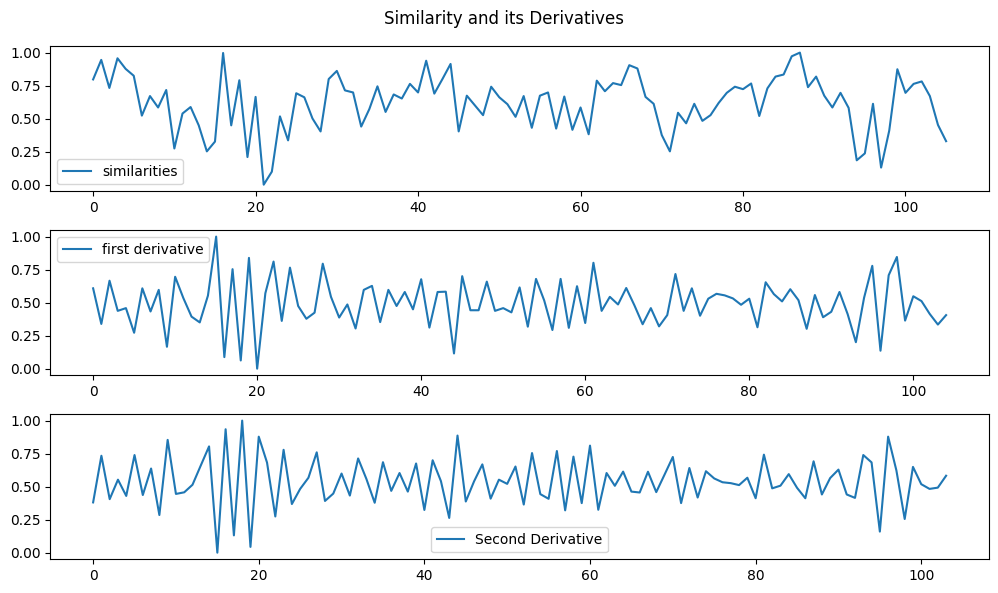

In [35]:
similarities = utils.cosine_similarity(spectrum)
d_similarities = np.diff(similarities)
dd_similarities = np.diff(d_similarities)
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(utils.norm(similarities), label='similarities')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(utils.norm(d_similarities), label="first derivative")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(utils.norm(dd_similarities), label='Second Derivative')
plt.legend()
plt.suptitle("Similarity and its Derivatives")
plt.tight_layout()
plt.show()